In [1]:
import numpy as np
import pandas as pd
from random import randint
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
num_of_dots = randint(5, 20)
dots = {'x': [], 'y': []}
for i in range(num_of_dots):
    dots['x'].append(randint(-100, 100))
    dots['y'].append(randint(-100, 100))
df = pd.DataFrame(data=dots)
df = df.sort_values(by='x')
print(df)

    x   y
1 -51 -30
4 -44 -66
6 -13  61
3  -1 -64
0  39  80
2  42 -72
5  44 -68
7  47  93


<AxesSubplot:xlabel='x'>

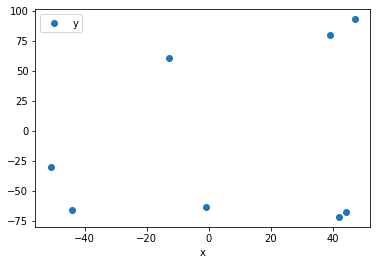

In [3]:
df.plot(x='x', y='y', style='o')

In [4]:
df = df.sort_values(by=['x'])

In [5]:
x_i = np.linspace(min(df.x), max(df.x), num=100)
print(x_i)

[-51.         -50.01010101 -49.02020202 -48.03030303 -47.04040404
 -46.05050505 -45.06060606 -44.07070707 -43.08080808 -42.09090909
 -41.1010101  -40.11111111 -39.12121212 -38.13131313 -37.14141414
 -36.15151515 -35.16161616 -34.17171717 -33.18181818 -32.19191919
 -31.2020202  -30.21212121 -29.22222222 -28.23232323 -27.24242424
 -26.25252525 -25.26262626 -24.27272727 -23.28282828 -22.29292929
 -21.3030303  -20.31313131 -19.32323232 -18.33333333 -17.34343434
 -16.35353535 -15.36363636 -14.37373737 -13.38383838 -12.39393939
 -11.4040404  -10.41414141  -9.42424242  -8.43434343  -7.44444444
  -6.45454545  -5.46464646  -4.47474747  -3.48484848  -2.49494949
  -1.50505051  -0.51515152   0.47474747   1.46464646   2.45454545
   3.44444444   4.43434343   5.42424242   6.41414141   7.4040404
   8.39393939   9.38383838  10.37373737  11.36363636  12.35353535
  13.34343434  14.33333333  15.32323232  16.31313131  17.3030303
  18.29292929  19.28282828  20.27272727  21.26262626  22.25252525
  23.2424242

In [6]:
interp_y = interpolate.pchip_interpolate(df.x, df.y, x_i)

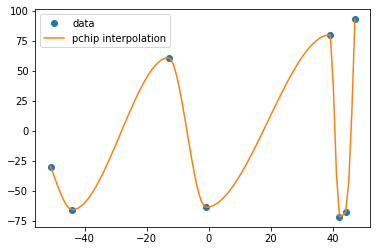

In [7]:
plt.plot(df.x, df.y, "o", label="data")
plt.plot(x_i, interp_y, label="pchip interpolation")
plt.legend()
plt.show()

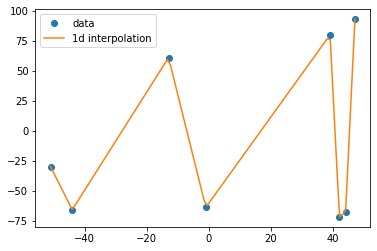

In [8]:
f = interpolate.interp1d(df.x, df.y)
ynew = f(x_i)   
plt.plot(df.x, df.y, 'o', label='data')
plt.plot(x_i, ynew, '-', label='1d interpolation')
plt.legend()
plt.show()

In [9]:
# Lagrange Interpolation
def lagrange(x, y, a):
    res = 0.0
    for i in range(len(y)):
        t = y[i]
        for j in range(len(y)):
            if i != j:
                t *= (a - x[j]) / (x[i] - x[j])
        res += t
    return res

In [10]:
y_interpolated = []
for i in range(len(x_i)):
    y_interpolated.append(lagrange(df.x, df.y, x_i[i]))

In [11]:
from scipy.interpolate import barycentric_interpolate
y_bar = barycentric_interpolate(df.x, df.y, x_i)

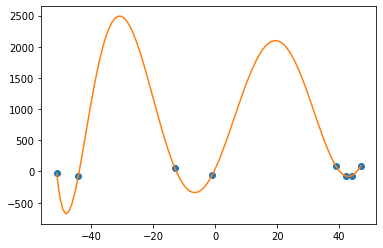

In [12]:
plt.plot(df.x, df.y, 'o', label='data')
plt.plot(x_i, y_interpolated, '-', label='my own interpolation')
plt.show()

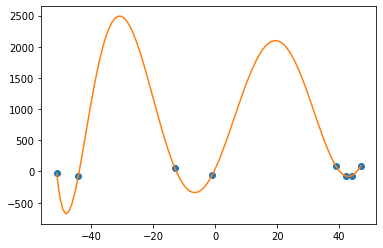

In [13]:
plt.plot(df.x, df.y, 'o', label='data')
plt.plot(x_i, y_bar, '-', label='scipy interpolation')
plt.show()

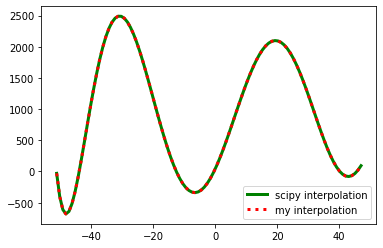

In [14]:
plt.plot(x_i, y_bar, 'g-', label='scipy interpolation', linewidth=3)
plt.plot(x_i, y_interpolated, 'r:', label='my interpolation', linewidth=3)
plt.legend()
plt.show()